# Exemplo: Modelo cinético de reação de isomerização

## Introdução


O problema abordado refere-se à estimação dos parâmetros do modelo cinético da reação de pirólise  do biciclohexano na fase de vapor. Esta reação tem como produto o 1,5-hexadieno [1] e é exemplificada pela Figura 1.

**Figura 1: Reação de pirólise do biciclohexano. Fonte: [1]**
![Tanques](./Imagens/P.jpg)

Os dados experimentais para esta reação, numa faixa de temperatura de 327 à 366 ºC, são apresentados na Tabela 1.     

**Tabela 1: Dados experimentais. Fonte: [1]**     
                                               
  Temperatura / °C | Pressâo do reagente (mm) | Tempo (min) | Fração do reagente (%) |       $k$ x $10^{5}$
  :-------------: |  :----------------------: |:-----------:|:---------------------: |:------------------------:
         327.2    |         18.4                        |120              |90.0                  |1.46 
         327.2    |         18.3                        |60.0             |94.9                  |1.43
         338.9    |         18.3                        |60.0             |88.6                  |3.37
             .    |         .                           |.                |.                     |.
             .    |         .                           |.                |.                     |.
             .    |         .                           |.                |.                     |.
         366.3    |         0.45                        |60.0             |46.8                  |21.1  
         366.3    |         0.30                        |30.0             |47.6                  |21.8
         366.3    |         0.25                        |60.0             |49.7                  |19.4
           
           
O modelo cinético para esta reação é dado por [2]: 

$y = \exp\left[-t\cdot \exp\left(K_0-\frac{E}{T}\right)\right]$,                  (1)

em que $y$ é a fração do reagente, $t$ é o tempo, $T$ é a temperatura em K, por fim, $k_o$ e $E$ são os parâmetros a serem estimados.

Então, o problema de otimização a ser resolvido envolve o uso da função objetivo de mínimos quadrados ponderados pelo inverso da variância, conforme [2]:

$\min_{ko,E} \sum_{i=1}^{NE} \left(\frac{y^{exp}_i-y_i(k_o,E)}{u^2_{y_i}}\right)$ (2)

sujeito à (1).

Para resolução deste problema no MT_PEU serão usados os símbolos:

* Símbolos das grandezas independentes (tempo e temperatura): t, T
* Símbolos das grandezas dependentes (fração de reagente): y
* Símbolos dos parâmetros: ko, E

## Importação de pacotes

Importação de bibliotecas (pacotes) necessárias para execução do código.

* **MT_PEU**: biblioteca que contém as principais funcionalidades da ferramenta

    * Importar a classe **EstimacaoNaoLinear**, que será utilizada neste exemplo de estimação não linear

* **casadi**: biblioteca para computação simbólica

    * será necessária somente a função **vertcat** para construção do modelo

In [1]:
from MT_PEU import EstimacaoNaoLinear
from casadi import exp

## Criação de modelo

O modelo (1) representa o comportamento da grandeza dependente, no qual os parâmetros $k_o$ e $E$ serão estimados.

Este modelo é definido, então, na forma de uma subrotina, **def**, do python e representado por:

In [2]:
def modelo (param, x, args):

    ko, E = param[0], param[1]
    tempo, T = x[:,0], x[:,1]

    return  exp(-tempo*exp(ko-E/T)) # cálculo de y - vetorizado

## Inicialização de classe

Para executar a estimação, o primeiro passo é configurar a classe **EstimacaoNaoLinear**, inicialmente, incluindo informações básicas:

* O modelo,
* Os símbolos para as grandeza independentes *(x)*; 
* Os símbolos para as grandezas dependentes *(y)*; 
* Os símbolos para os parâmetros *(param)*;
* O nome do projeto, o nome da pasta onde serão gerados os resultados.


In [3]:
Estime = EstimacaoNaoLinear(modelo, simbolos_x=['t','T'], simbolos_y=['y'],
                            simbolos_param=['ko','E'],  Folder='ModeloCineticoEX2')


## Inclusão de dados

Os dados experimentais disponibilizados em [2] da variável dependente (y) e das variáveis independentes (t e T), são apresentados abaixo na forma de listas:


In [4]:
#Tempo
tempo = [120.0,60.0,60.0,120.0,120.0,60.0,60.0,30.0,15.0,60.0,
45.1,90.0,150.0,60.0,60.0,60.0,30.0,90.0,150.0,90.4,120.0,
60.0,60.0,60.0,60.0,60.0,60.0,30.0,45.1,30.0,30.0,45.0,15.0,30.0,90.0,25.0,
60.1,60.0,30.0,30.0,60.0]

#Temperatura
temperatura = [600.0,600.0,612.0,612.0,612.0,612.0,620.0,620.0,620.0,
620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,
620.0,620.0,620.0,620.0,620.0,620.0,631.0,631.0,631.0,631.0,631.0,639.0,639.0,
639.0,639.0,639.0,639.0,639.0,639.0,639.0]

y = [0.9,0.949,0.886,0.785,0.791,0.890,0.787,0.877,0.938,
0.782,0.827,0.696,0.582,0.795,0.800,0.790,0.883,0.712,0.576,0.715,0.673,
0.802,0.802,0.804,0.794,0.804,0.799,0.764,0.688,0.717,0.802,0.695,0.808,
0.655,0.309,0.689,0.437,0.425,0.638,.659,0.449]

Como entrada **obrigatória**, a plataforma MT_PEU necessita da **incerteza dos dados experimentais** (ux1, ux2, uy1).
Neste exemplo, foram adotados o valor 1 para as incertezas.

In [5]:
uxtempo = [1]*41
uxtemperatura = [1]*41
uy = [1]*41

**Inclusão de dados experimentais na estimação:**

O método *setDados* é utilizado para incluir os dados para as grandezas dependentes e independentes. Sintaxe:

* identificação da grandeza, se independente ou dependente: 0 ou 1 (respectivamente)
* os dados experimentais e suas incertezas inseridos em sequência na forma de tuplas.



In [6]:
Estime.setDados(0,(tempo,uxtempo),(temperatura,uxtemperatura))
Estime.setDados(1,(y,uy))

Define que os dados experimentais previamente inseridos serão utilizados como um conjunto de dados para o qual os 
parâmetros serão estimados:

In [7]:
Estime.setConjunto()

## Otimização


Neste exemplo, o usuário tem a opção de escolha do algoritmo a ser utilizado na otimização. 
Disponiveis: 'ipopt', 'bonmin'. 
Caso opte por não escolher, será utilizado o algoritmo default: ipopt.

Para realizar a otimização é obrigatório informar a estimativa inicial que, neste caso, será [0.03 , 20000.00].


In [8]:
Estime.optimize(initial_estimative= [18, 20000.000],algoritmo='ipopt')


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



## Incerteza dos parâmetros

Como os dados experimentais possuem incerteza, estas devem ser propagadas para os parâmetros.

Métodos disponíveis: 2InvHessiana, Geral, SensibilidadeModelo. 

Para avaliação da região de abrangência dos parâmetros, pelo método da verossimilhança, a opção **preencherregiao**. 

Por definição o preenchimeto da região de verossimilhança é 'True', caso necessário esta opção pode ser alterada.

Caso o usuário **não** tenha interesse em **avaliar a incerteza dos parâmetros**, não execute o método abaixo.


In [9]:
Estime.incertezaParametros(metodoIncerteza='2InvHessiana',objectiveFunctionMapping=True)

C:\Users\User\Desktop\MT_PEU\MT_PEU.py:2013: UserWarning: Os gráficos envolvendo somente as grandezas calculadas (X e Y) não puderam ser criados, pois o método predicao não foi executado.
  warn('Os gráficos envolvendo somente as grandezas calculadas (X e Y) não puderam ser criados, pois o método predicao não foi executado.',UserWarning)


<Figure size 432x288 with 0 Axes>

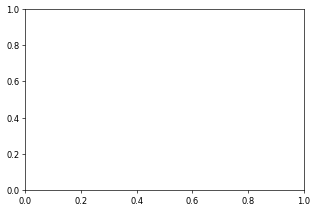

In [10]:
Estime.graficos() #Mudanças futuras

## Predição de análise de resíduos

 No método predição, é feita a avaliação da grandeza dependente com base nos parâmetros fornecidos. 
 A covariância é avaliada, e é possível inferir sobre a qualidade do modelo. 
 
 A análise de resíduos, tras mais informações referents à qualidade do modelo, a exemplo: (i) relação de tendência não inclusa no modelo, (ii) correlações indevidas, etc. Testes estatisticos são utilizados para estas avaliações como: (i) o de homocedasticidade, (ii) $\chi^2$.
 A predição e análise de residuos é feita com os dados de validação, quando disponíveis.


In [11]:
Estime.predicao()
Estime.analiseResiduos()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


## Gráficos e relatório

Nesta etapa ocorre a geração dos dados de saída do programa : relátorios e gráficos. 
Os gráficos são gerados de acordo com as etapas que foram realizadas. No relátorio contém informações a respeito.
dos testes estatisticos, função objetivo, matriz de covariância, status da otimização, dentre outros.


In [12]:
#etapas = ['otimizacao','grandezas-entrada', 'predicao','grandezas-calculadas','analiseResiduos', 'regiaoAbrangencia']
Estime.graficos()
Estime.relatorio()

<Figure size 432x288 with 0 Axes>

<Figure size 360x240 with 0 Axes>

## Referências: 

[1] SRINIVASAN, R.; LEVI, A. A.. Kinetics of the Thermal Isomerization of Bicyclo [2.1.1 ]hexane. Journal Of The American Chemical Society, [s.l.], v. 85, n. 21, p.3363-3365, 5 nov. 1963. American Chemical Society (ACS)

[2] SCHWAAB, M.M.;PINTO, J.C. Análise de Dados Experimentais I: Fundamentos da Estátistica e Estimação de Parâmetros. 
Rio de Janeiro: e-papers, 2007.

INMETRO.: Avaliação de dados de medição — Guia para a expressão de incerteza de medição. Rio de Janeiro: Jcgm, 2008.


